In [2]:
#installing torch vision
!pip install torch torchvision

In [3]:
#import required libraries
import torchvision 
import torch

In [ ]:
#download and load MNIST dataset
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [5]:
#create autoencoder class with 2 hidden layers and input + output
class AE(torch.nn.Module):
    def __init__(self, D_in = 784, H1 = 10, H2 = 10, D_out = 784):
        """
        In the constructor we instantiate four nn.Linear modules and assign them as
        member variables.
        """
        super(AE, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H1)
        self.linear2 = torch.nn.Linear(H1, H2)
        self.linear3 = torch.nn.Linear(H2, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        lin1 = self.linear1(x)
        sigm1 = torch.sigmoid(lin1)
        lin2 = self.linear2(sigm1)
        sigm2 = torch.sigmoid(lin2)
        y_pred = self.linear3(sigm2)
        return y_pred


In [6]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AE().cuda()
# Adam optimizer with learning rate 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# mean-squared error loss
criterion = torch.nn.MSELoss()

In [32]:
#train for 200 epochs
epochs = 200
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        #raise Exception()
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
#saving the model    
torch.save(model.state_dict(), 'model.pt')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch : 1/200, loss = 0.035008
epoch : 2/200, loss = 0.035009
epoch : 3/200, loss = 0.035008
epoch : 4/200, loss = 0.035007
epoch : 5/200, loss = 0.035009
epoch : 6/200, loss = 0.035008
epoch : 7/200, loss = 0.035008
epoch : 8/200, loss = 0.035008
epoch : 9/200, loss = 0.035009
epoch : 10/200, loss = 0.035008
epoch : 11/200, loss = 0.035007
epoch : 12/200, loss = 0.035008
epoch : 13/200, loss = 0.035008
epoch : 14/200, loss = 0.035008
epoch : 15/200, loss = 0.035009
epoch : 16/200, loss = 0.035008
epoch : 17/200, loss = 0.035008
epoch : 18/200, loss = 0.035009
epoch : 19/200, loss = 0.035009
epoch : 20/200, loss = 0.035008
epoch : 21/200, loss = 0.035008
epoch : 22/200, loss = 0.035008
epoch : 23/200, loss = 0.035010
epoch : 24/200, loss = 0.035009
epoch : 25/200, loss = 0.035008
epoch : 26/200, loss = 0.035010
epoch : 27/200, loss = 0.035007
epoch : 28/200, loss = 0.035009
epoch : 29/200, loss = 0.035008
epoch : 30/200, loss = 0.035009
epoch : 31/200, loss = 0.035008
epoch : 32/200, l

In [33]:
#load the model
model = AE()
model.load_state_dict(torch.load('model.pt'))
device = torch.device("cuda")
model.to(device)
model.eval()

AE(
  (linear1): Linear(in_features=784, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=784, bias=True)
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


ORIGINAL


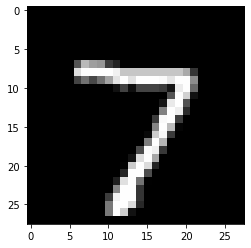

RECONSTRUCTED


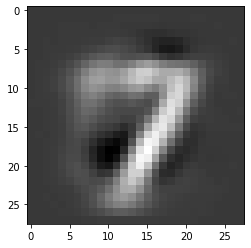

ORIGINAL


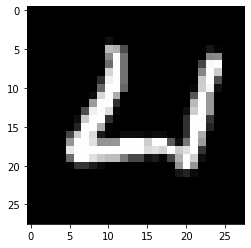

RECONSTRUCTED


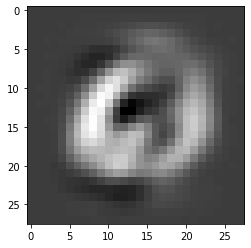

ORIGINAL


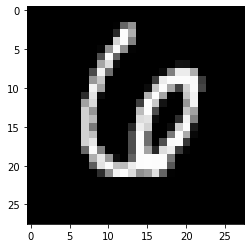

RECONSTRUCTED


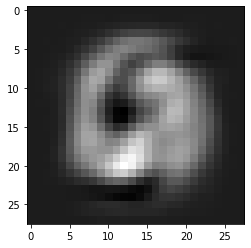

ORIGINAL


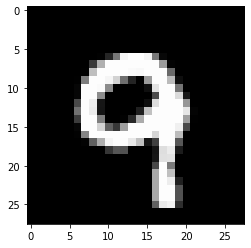

RECONSTRUCTED


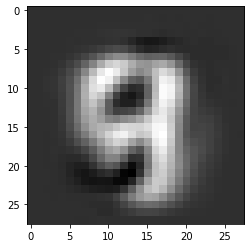

ORIGINAL


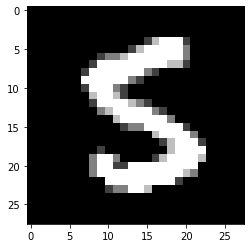

RECONSTRUCTED


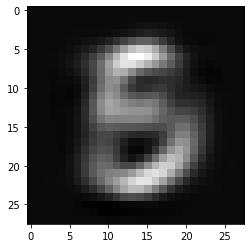

ORIGINAL


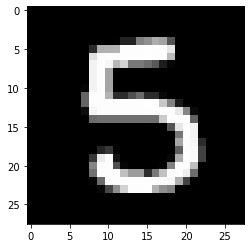

RECONSTRUCTED


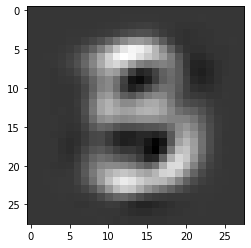

ORIGINAL


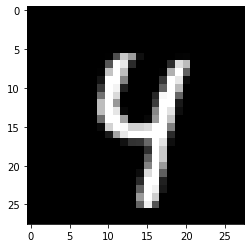

RECONSTRUCTED


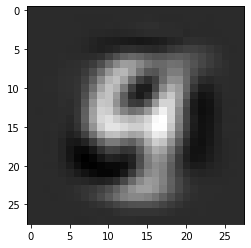

ORIGINAL


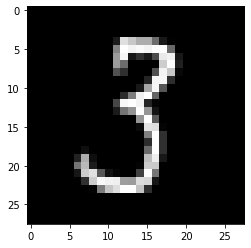

RECONSTRUCTED


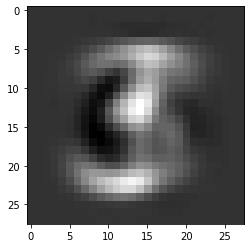

ORIGINAL


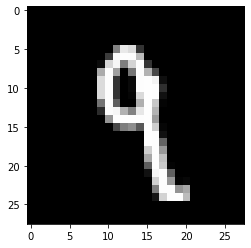

RECONSTRUCTED


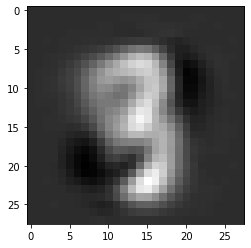

ORIGINAL


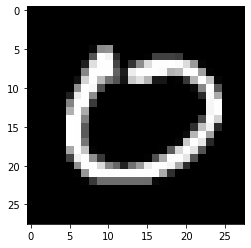

RECONSTRUCTED


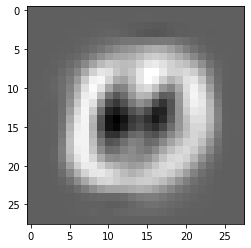

ORIGINAL


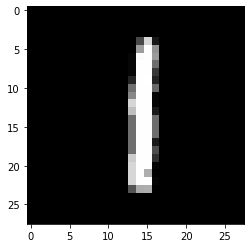

RECONSTRUCTED


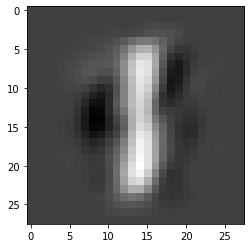

ORIGINAL


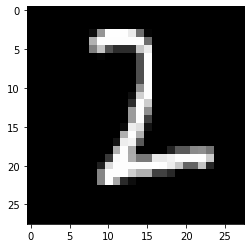

RECONSTRUCTED


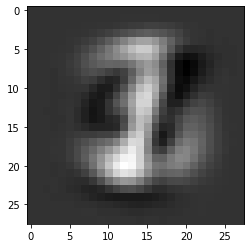

ORIGINAL


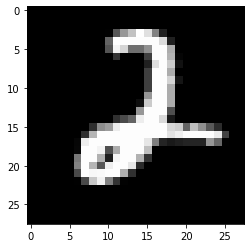

RECONSTRUCTED


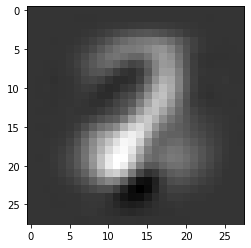

ORIGINAL


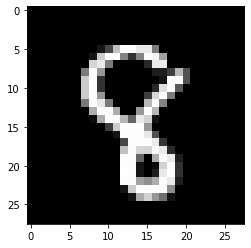

RECONSTRUCTED


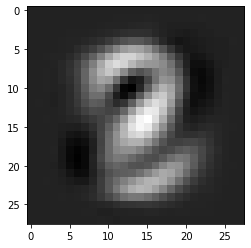

ORIGINAL


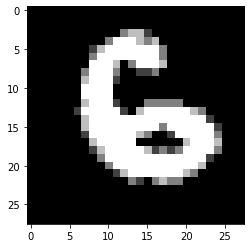

RECONSTRUCTED


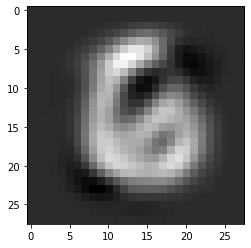

ORIGINAL


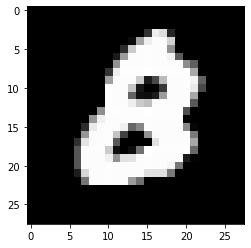

RECONSTRUCTED


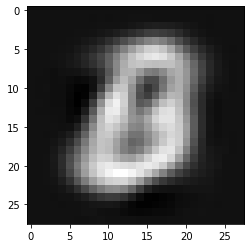

ORIGINAL


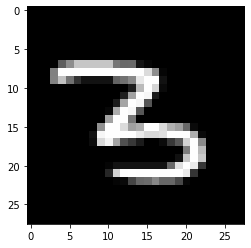

RECONSTRUCTED


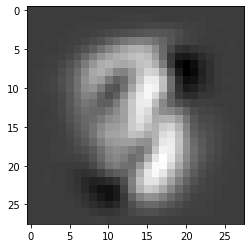

ORIGINAL


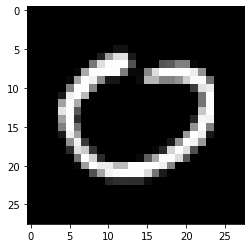

RECONSTRUCTED


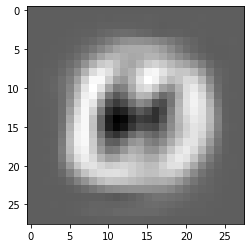

ORIGINAL


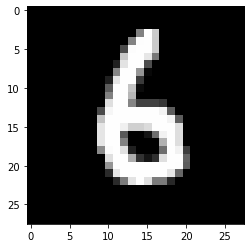

RECONSTRUCTED


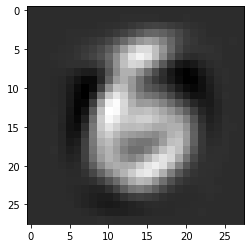

ORIGINAL


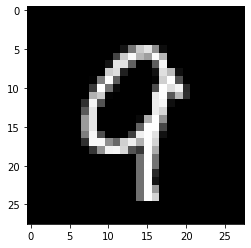

RECONSTRUCTED


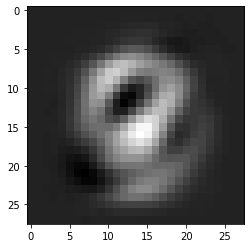

ORIGINAL


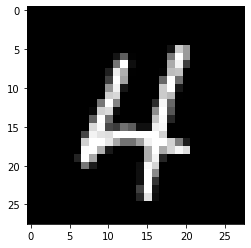

RECONSTRUCTED


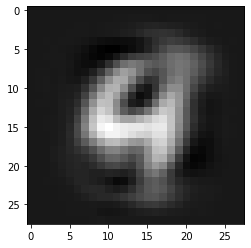

ORIGINAL


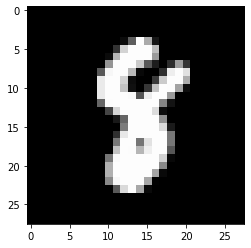

RECONSTRUCTED


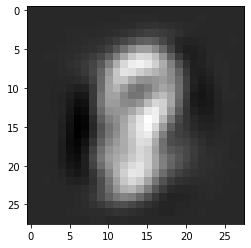

ORIGINAL


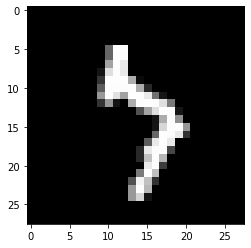

RECONSTRUCTED


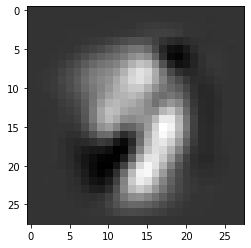

ORIGINAL


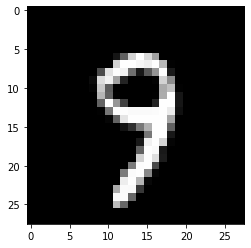

RECONSTRUCTED


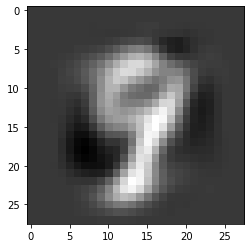

ORIGINAL


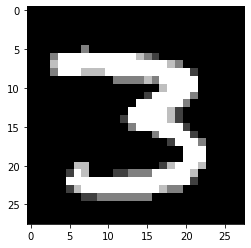

RECONSTRUCTED


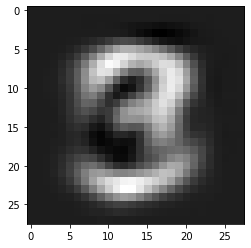

ORIGINAL


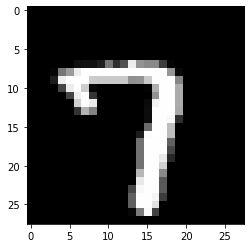

RECONSTRUCTED


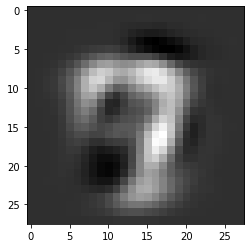

ORIGINAL


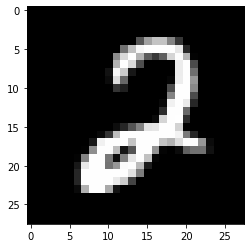

RECONSTRUCTED


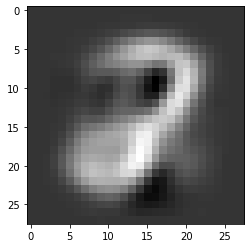

ORIGINAL


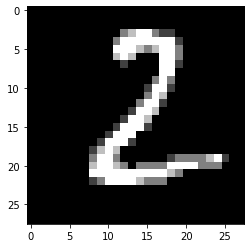

RECONSTRUCTED


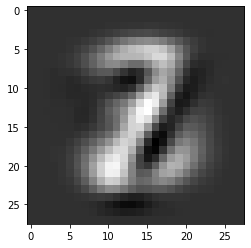

ORIGINAL


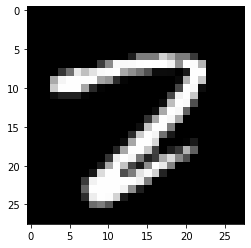

RECONSTRUCTED


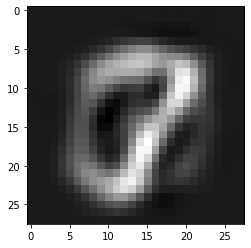

ORIGINAL


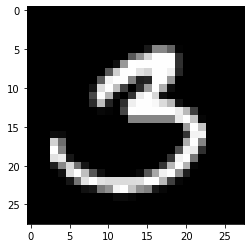

RECONSTRUCTED


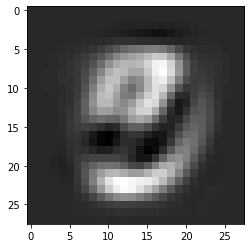

ORIGINAL


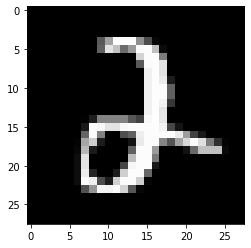

RECONSTRUCTED


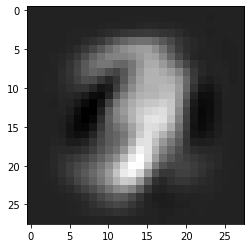

ORIGINAL


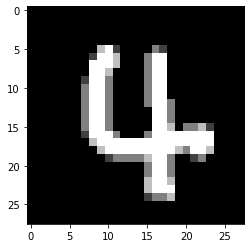

RECONSTRUCTED


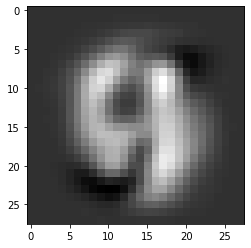

In [34]:
#test the model for 32 samples and visualize the original and reconstructed images
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import imshow
i = 0        
for batch_features, _ in test_loader:
  if i == 32:
    i = 0
    break
  # pick a sample to plot
  print("ORIGINAL")
  sample = 1
  image = batch_features.view(-1, 784)[i].numpy().reshape(28,28)
  # plot the sample
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  plt.show()
  print("RECONSTRUCTED")
  batch_features = batch_features.view(-1, 784).to(device)
  outputs = model(batch_features)
  image = outputs[i].cpu().detach().numpy().reshape(28,28)
  # plot the sample
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  plt.show()
  i += 1